# Lecture 5.4: Chi-Square Tests

## Outline

* Goodness-of-fit test
* $\chi^2$ distribution
* Test for independence
* Multiple tests

## Objectives

* Learn about $\chi^2$ distribution and chi-square tests
* Become familiar with goodness of fit and independence tests
* Understand Bonferroni correcction for multiple comparisons

## Story Time

Long long ago, there lived a candy fairy. His name is Lee Skittle.  

Lee's hobby was to turn flowers into candies with different colors, and he told his dog, Aria, that he always had the same number of candies of each color.  

Aria got hungry one day, and decided to eat one bag of Lee's candies that he had hidden under a giant mushroom. Aria loved math, so as she was eating the candies, she counted how many candies of each color she ate.  

Lee was furious when he discovered that his candies were gone, and he decided to marry Aria to Mr. M., a brown bear who liked wearing colorful clothes. The night before Aria and Mr. M.'s wedding, Aria told Lee, I want to tell you a secret about your candies, "you had been wrong all these years, Lee, you didn't have the same number of candies of each color - there were 11 red candies, 11 green candies, 10 yellow candies, 10 purple candies and 8 orange candies in the bag I found."  

Lee was shocked about what Aria told him that night, and he thought a lot about the distribution of the candy colors. It was very very important to him that all the colors were evenly distributed, but he had made more than a googol candies, most of which had already been eaten, so he couldn't count all of the candies by colors.  

What should Lee do?...

Assum that the bag of candies that Aria ate was a simple random sample of all the candies Lee had made.

| |Red|Green|Yellow|Purple|Orange|
|:-|-:|-:|-:|-:|-:|-:|
|Counts|11|11|10|10|8|

How can we check if the entire candy population is evenly distributed across the different colors?

## Chi-square goodness-of-fit test

The Chi-square test allows us to evaluate goodness of fit for a model. 

So, we can suggest a model and then compare our sample against that model.

$H_0: P(Red)=P(Green)=P(Yellow)=P(Purple)=P(Orange)=0.2$  
$H_a:$ At least one proprotion is not equal to the above

| |Red|Green|Yellow|Purple|Orange|
|:-|-:|-:|-:|-:|-:|-:|
|Counts|11|11|10|10|8|
|Expected|10|10|10|10|10|



In [1]:
%pylab inline

import pandas as pd
import statsmodels.api as sm

from IPython.display import Latex, YouTubeVideo

from scipy import stats
from statsmodels.graphics.gofplots import qqplot
from statsmodels.distributions.empirical_distribution import ECDF

Populating the interactive namespace from numpy and matplotlib


In [2]:
colors = ["Red", "Green", "Yellow", "Blue", "Orange"]
counts = [11, 11, 10, 10, 8]
e = 10

print(pd.DataFrame({"Counts": counts, "Expected": [e] * len(counts)}, index=colors).T)

stats.chisquare(counts, [e] * 5)

          Red  Green  Yellow  Blue  Orange
Counts     11     11      10    10       8
Expected   10     10      10    10      10


Power_divergenceResult(statistic=0.60000000000000009, pvalue=0.96306368688623323)

So we don't have evidence to say that the candies aren't distributed evenly across different colors.  

Lee can finally have a good night sleep now.

How does this work?  

To conduct the test, first we need a test statistic

$$\chi^2 = \sum {\left(O_i - E_i \right)^2 \over E_i}$$
O is the observed count  
E is the expected count

So in our case:
$$\chi^2 = \frac{(11-10)^2}{10} + \frac{(11-10)^2}{10} + \frac{(10-10)^2}{10} + \frac{(10-10)^2}{10} + \frac{(8-10)^2}{10}$$

In [3]:
((11-10)**2 + (11-10)**2 + (10-10)**2 + (10-10)**2 + (8-10)**2) / 10

0.6

In [4]:
sum((o - e)**2 for o in counts) / e

0.6

The test statistic follows $\chi^2$ distribution.

Now we need to check this against the $\chi^2$ distribution to get our p-value.  


What is the $\chi^2$ distribution again?

$$\chi^2(k,x) = {1 \over {2^\frac{k}{2}\Gamma\left(\frac{k}{2}\right)}}x^{\frac{k}{2}-1}e^{-\frac{x}{2}}$$

here $k$ is a parameter called the degrees of freedom  


For goodness of fit test, the degrees of freedom is number of categories minus one.  
So for our skittles example the degrees of freedom is $5 - 1 = 4$.

$\Gamma(\frac{k}{2})$ is the gamma function:  
$$\Gamma(n) = (n-1)!, n \in \mathbb{N}$$
$$\Gamma(t) = \int\limits_0^\infty x^{t-1}e^{-x}dx$$

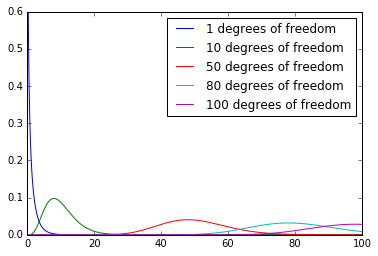

In [5]:
x = linspace(0.001, 100, 2000)

degrees = [1,10,50,80, 100]

for i in degrees:
    dist = stats.chi2(df=i)
    y = dist.pdf(x)
    plot(x, y, label = '{} degrees of freedom'.format(i))
    
ylim(0, 0.6); legend()
plt.figure(figsize=(12,10));

In [6]:
stats.chisquare(counts, [e] * 5)[1]

0.96306368688623323

In [7]:
df = len(counts) - 1
x = sum((o - e)**2 for o in counts) / e
stats.chi2(df=df).sf(x)

0.96306368688623323

### Assumptions
* That the data is randomly selected
* The sample data consists of frequency counts for each of the different categories
* For each category, the expected frequency need to be at least 5

### The Story Continues..  

After Aria and Mr. M. got married, in order to woo Aria's love, Mr. M. started making candies for her. He made two kinds of candies, one with chocolate and one with peanuts, and he liked to covered all the candies with colorful sugar coats.  

Aria, loving math as aways, started counting the two different types of candies by colors. One day, she told Mr. M., "M., my love, your chocolate candies and peanut candies don't have the same color distribution - the color distribution depends on the type of candy I'm eating."  Mr. M. tried to count all the candies he had in his pockets, but he didn't have enough fingers and toes.  

How can Mr. M. check if Aria is right?

## Test for independence

Here are the counts of the candies Mr. M. had in his pocket, by color and candy type.

| |Red|Green|Yellow|Blue|Orange|
|:-|-:|-:|-:|-:|-:|-:|
|Chocolate|7|2|11|8|5|
|Peanuts|8|9|4|1|3|


In [8]:
data = pd.DataFrame({"Chocolate": [7, 2, 11, 8, 5], "Peanut": [8, 9, 4, 1, 3]}, index=colors).T
data

,Red,Green,Yellow,Blue,Orange
Chocolate,7,2,11,8,5
Peanut,8,9,4,1,3


$H_0$: the colors and candy types are independent  
$H_a$: the colors and canday types are dependent  

In [9]:
stats.chi2_contingency?

In [10]:
chi2, p, dof, expected = stats.chi2_contingency(data)

Latex(r"$\chi^2 = {:.4}; p = {:.2}$".format(chi2, p))

<IPython.core.display.Latex object>

$$\chi^2 = \sum {\left(O_i - E_i \right)^2 \over E_i} = 12.87$$  

$$ \text{p-value}\approx 0.01 $$  

p-value is small, so we reject the null hypothesis.  

We have very strong evidence to conclude that Aria is right, the candy type and color distribution are dependent.

## How does this work?

* It's actually the same thing as before, just without a model.
* We calculate the expected values based on the data.
* We can do this because we are able to obtain the joint probabilities from the contingency table
* If the events are independent, $P(A \cap B) = P(A) \times P(B)$  
* So, assuming independence gives us the probabilities for calculating the expected counts
* $H_0:$ the two variables are independent
* $H_a:$ the two variables are not independent

| |Red|Green|Yellow|Blue|Orange|
|:-|-:|-:|-:|-:|-:|-:|
|Chocolate|7|2|11|8|5|
|Peanuts|8|9|4|1|3|


What is $P(color = red)$  
What is $P(type = chocolate)$

$$P(color = red) = \frac{15}{58}$$
$$P(type = chocolate) = \frac{33}{58}$$
If we assume independence this means:  
$$P(color = red\ \cap\ type = chocolate) = \frac{15}{58} \times \frac{33}{58} $$  
Since there are 58 elements in the table, the expected value for red chocolate candy is $\frac{15}{58} \times \frac{33}{58} \times 58$


Can you fill in the table with expected counts?  

| |Red|Green|Yellow|Blue|Orange|
|:-|-:|-:|-:|-:|-:|-:|
|Chocolate||||||
|Peanuts|||||||


In [11]:
expected_df = pd.DataFrame(expected, index=['Chocolate', 'Peanut'], columns=colors)

print("E(red chocolate candy) = {:.4}".format(15 / 58 * 33))

print("\nObserved:\n{}".format(data))
print("\nExpected:\n{}".format(expected_df))

E(red chocolate candy) = 8.534

Observed:
           Red  Green  Yellow  Blue  Orange
Chocolate    7      2      11     8       5
Peanut       8      9       4     1       3

Expected:
                Red     Green    Yellow     Blue    Orange
Chocolate  8.534483  6.258621  8.534483  5.12069  4.551724
Peanut     6.465517  4.741379  6.465517  3.87931  3.448276


Degrees of freedom for independence test is (number of rows - 1) * (number of columns - 1). So in our example we have (5 - 1) * (2 - 1) = 4

### Sum up $\chi^2$

* Distribution for sum of squares of standard normals
* Can be used for goodness of fit tests and tests of independence
* These are really the same thing mathematically, but they use slightly different methods so get called different things
* Both tests extract a p-value using $\sum{(O_i - E_i)^2\over E_i}$  
* For goodness of fit, the expected values are what you get out of your model, and a low p-value means you reject the model
* For independence tests you calculate the $E_i$ using an assumption of independence of the variables, then a low p-value means they are not independent

---
_and now for something completely different!_

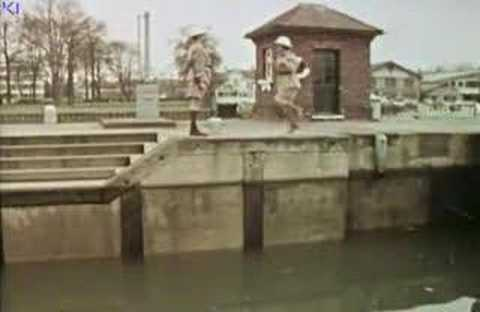

In [12]:
YouTubeVideo('IhJQp-q1Y1s')

In [13]:
!pip install ipy-table

  Running setup.py bdist_wheel for ipy-table ... - \ done
  Stored in directory: /Users/jonathanhilgart/Library/Caches/pip/wheels/9c/be/22/d76f7d4af38d6d8e1832ceaa460c45e1c617aa094ef3bd834c
Successfully built ipy-table


In [14]:
from ipy_table import *

---
# Data snooping

## Neural correlates of interspecies perspective taking in the post-mortem Atlantic Salmon: 

### An argument for multiple comparisons correction

![salmon](http://www.wired.com/images_blogs/wiredscience/2009/09/fmri-salmon.jpg)  

http://prefrontal.org/files/posters/Bennett-Salmon-2009.pdf

We've talked about the need for having our hypotheses determined *before* looking at the summary table. Here is a simple example to illustrate the danger of looking at summaries of the data before deciding which hypothesis to test.

Below, I will create complete noise datasets but try to find "the best model". There is nothing wrong with finding the best model, what is wrong is trusting the results of the summary table **after having chosen this as the best model**.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                    0.4693
Date:                Mon, 03 Oct 2016   Prob (F-statistic):              0.497
Time:                        14:25:03   Log-Likelihood:                -76.044
No. Observations:                  50   AIC:                             156.1
Df Residuals:                      48   BIC:                             159.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.0940      0.160     -0.587      0.560        -0.416     0.228
x1            -0.1184      0.173     -0.685      0.497        -0.466     0.229
==============================================================================
Omnibus:                        0.430   Durbin-Watson:                   2.139
Prob(Omnibus):                  0.807   Jarque-Bera (JB):                0.573
Skew:                          -0.021   Prob(JB):                        0.751
Kurtosis:                       2.477   Cond. No.                         1.10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

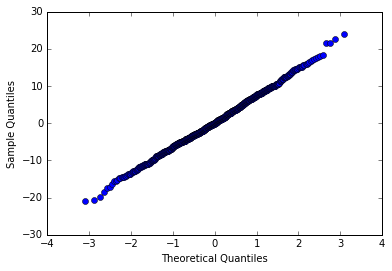

In [15]:
X = randn(50000).reshape((50,1000))
Y = randn(50)
Z = (X.T.dot(Y - Y.mean())) / Y.std()
qqplot(Z)
sm.OLS(Y, sm.add_constant(X[:,0])).fit().summary()

The collection of 1000 $T$ statistics looks pretty close to a normal (with 50 degrees of freedom). This is not surprising.

Now, let's look at the largest $T$

In [16]:
largest_T = abs(Z).argmax()
sm.OLS(Y, sm.add_constant(X[:, largest_T])).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     11.56
Date:                Mon, 03 Oct 2016   Prob (F-statistic):            0.00136
Time:                        14:25:04   Log-Likelihood:                -70.891
No. Observations:                  50   AIC:                             145.8
Df Residuals:                      48   BIC:                             149.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.0775      0.144     -0.537      0.594        -0.367     0.212
x1             0.4524      0.133      3.400      0.001         0.185     0.720
==============================================================================
Omnibus:                        4.045   Durbin-Watson:                   2.479
Prob(Omnibus):                  0.132   Jarque-Bera (JB):                1.833
Skew:                          -0.045   Prob(JB):                        0.400
Kurtosis:                       2.066   Cond. No.                         1.09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The $T$ statistic is much larger in absolute value than it should be.
Let's repeat this experiment many times.

In [17]:
def largest_T_sim(printit = False):
    X = randn(500).reshape((50,10))
    Y = randn(50)
    Z = (X.T.dot(Y - Y.mean())) / Y.std()
    largest_T = abs(Z).argmax()
    lm = sm.OLS(Y, sm.add_constant(X[:,largest_T])).fit()
    if printit:
        print(lm.summary())
    return lm.pvalues[1]

largest_T_sim(True)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     5.623
Date:                Mon, 03 Oct 2016   Prob (F-statistic):             0.0218
Time:                        14:25:04   Log-Likelihood:                -70.562
No. Observations:                  50   AIC:                             145.1
Df Residuals:                      48   BIC:                             148.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.0135      0.144      0.094      0.9

0.021791397625630392

We can do this many times and store the $p$-values. What will their distribution look like?

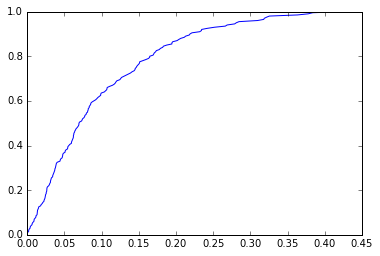

In [18]:
pval = pd.Series(largest_T_sim() for _ in range(200))
ecdf = ECDF(pval)
plot(ecdf.x, ecdf.y);

## Type I error

How likely are we to conclude there is an effect if we use these $p$-values?

In [19]:
ecdf(.05)

0.36499999999999999

In [20]:
pval.describe()

count    200.000000
mean       0.099466
std        0.088038
min        0.000285
25%        0.032430
50%        0.069943
75%        0.146748
max        0.428295
dtype: float64

Multiple Hypothesis Testing
==================================
<!-- adapted from http://www.stat.berkeley.edu/~mgoldman/Section0402.pdf -->

Why is multiple testing a problem?
--------------------------------
Say you have a set of hypotheses that you wish to test simultaneously.  The first idea that might come to mind is to test each hypothesis separately, using some level of significance. At first blush, this doesn't seem like a bad idea.  However, consider a case where you have 20 hypotheses to test, and a significance level of 0.05.  What's the probability of observing at least one significant result just due to chance?
$$\begin{align}
P(\text{at least one significant result}) &= 1 - P(\text{no significant results})\\
&=1 - (1 - 0.05)^{20} \\
&\approx 0.64
\end{align}$$
So, with 20 tests being considered, we have a 64% chance of observing at least one significant result, even if all of the tests are actually not significant.  In many fields,  it's  not  unusual  for  the  number  of  simultaneous  tests  to  be  quite  a bit larger than 20...  and the probability of getting a significant result simply due to chance keeps going up. 

Methods for dealing with multiple testing frequently call for adjusting in some way, so that the probability of observing at least one significant result due to chance remains below your desired significance level.

Bonferroni Correction
--------------------------------
The Bonferroni correction sets the significance cut-off at $\alpha/n$. For example, in the example above, with 20 tests and $\alpha=0.05$, you'd only reject a null hypothesis if the p-value is less than 0.0025.  The Bonferroni correction tends to be a bit too conservative.  To demonstrate this, let's calculate the probability of observing at least one signicant result when using the correction just described:
$$\begin{align}
P(\text{at least one significant result}) &= 1 - P(\text{no significant results})\\
&=1 - (1 - 0.0025)^{20} \\
&\approx 0.0488
\end{align}$$
Here, we're just a shade under our desired 0.05 level.  We benefit here from assuming that all tests are independent of each other.  In practical applications, that is often not the case.  Depending on the correlation structure of the tests, the Bonferroni correction could be extremely conservative, leading to a high rate of false negatives.

False Discovery Rate
--------------------------------
In large-scale multiple testing, you may be better served by controlling the false discovery rate (FDR). This is defined as the proportion of false positives among all significant results.  The FDR works by estimating some rejection region so that, on average, FDR $\lt\alpha$.

Comparing the three
--------------------------------
First, let's make some data.  For kicks and grins, we'll use the random normals in such a way
that we'll know what the result of each hypothesis test should be.

<!--
## Multiple Comparisons

The scenario of testing many pairs of groups is called **multiple comparisons**.  

* Suppose we want test a new way of teaching writing to students, and we randomly assign students to the new way of teaching and the standard way of teaching writing. Students in the two groups can be compared in terms of grammar, spelling, organization, content, and so on. As more attributes are compared, it becomes more likely that the two groups will appear to differ on at least one attribute by random chance alone.    


* Suppose we consider the efficacy of a drug in terms of the reduction of any one of a number of disease symptoms. As more symptoms are considered, it becomes more likely that the drug will appear to be an improvement over existing drugs in terms of at least one symptom.

**What can we do?**

For hypothesis testing, the problem of multiple comparisons (also known as the multiple testing problem) results from the increase in type I error that occurs when statistical tests are used repeatedly.

The **Bonferroni correction** suggests that a more stringent significance level is more appropriate for these tests:  

$$ \alpha^* = \alpha / K $$  

Where $\alpha$ is usually set to be 0.05, and $K$ is the total number of comparisons.  

The **Bonferroni correction** is one of the most conservative methods for counteracting the problem of multiple comparisons.
-->

In [21]:
seed(27)
x = randn(1000)
x[-100:] += 3
p = 1 - stats.norm.cdf(x)

These functions should all be familiar. Here, we've made a vector, x, of length 1000.  The first 900 entries are random numbers with a standard normal distribution.  The last 100 are random numbers from a normal distribution with mean 3 and sd 1.  Note that I didn't need to indicated the sd of 1 in the second bit; it's the default value. The next line of code is finding the p-values for a hypothesis test on each value of x.  The hypothesis being tested is that the value of x is not difierent from 0, given the entries are drawn from a standard normal distribution.  The alternate is a one-sided test, claiming that the value is larger than 0.

Now,  in  this  case,  we  know  the  truth:  The  first  900  observations  should  fail  to  reject the null hypothesis:  they are, in fact, drawn from a standard normal distribution and any difference between the observed value and 0 is just due to chance.  The last 100 observations should reject the null hypothesis:  the difference between these values and 0 is not due to chance alone.

Let's take a look at our p-values, adjust them in various ways, and see what sort of results
we get.  Note that, since we all will have our own random vectors, your figures will probably
be a different from mine.  They should be pretty close, however.

### 1. No corrections

In [22]:
test = p <= 0.05

In [23]:
def result_table(test_stats, pos=r'\text{Positive}', neg=r'\text{Negative}', head=' ', neg_count=900):
    pos_count = len(test_stats) - neg_count
    tbl = [(head, neg, pos, r'\text{Total}'),
           ('\mu=0', neg_count - sum(test_stats[ :neg_count]), sum(test_stats[ :neg_count]), neg_count),
           ('\mu=3', pos_count - sum(test_stats[-pos_count:]), sum(test_stats[-pos_count:]), pos_count)]
    return list(map(lambda r: list(map('${}$'.format, r)), tbl))

In [24]:
tbl = result_table(test, 'p\le0.05', 'p\gt0.05')
make_table(tbl)
set_global_style(align="right", width=67)
apply_theme('basic_both')

$ $,$p\gt0.05$,$p\le0.05$,$\text{Total}$
$\mu=0$,$852$,$48$,$900$
$\mu=3$,$6$,$94$,$100$


The type I error rate (false positives) is 48/900 = 0.0533.  The type II error rate (false
negatives) is 6/100 = 0.06.  Note that the type I error rate is awfully close to our $\alpha$, 0.05. This isn't a coincidence: $\alpha$ can be thought of as some target type I error rate.

### 2. Bonferroni correction

We have $\alpha=0.05$, and $1000$ tests, so the Bonferroni correction will have us looking for p-values smaller than $0.00005$.

In [25]:
bonftest = p <= 0.05/1000
tbl = result_table(bonftest, r'p\le\frac{.05}{1000}', r'p\gt\frac{.05}{1000}')
make_table(tbl)
set_global_style(align="right", width=67)
apply_theme('basic_both')

$ $,$p\gt\frac{.05}{1000}$,$p\le\frac{.05}{1000}$,$\text{Total}$
$\mu=0$,$900$,$0$,$900$
$\mu=3$,$78$,$22$,$100$


Here, the type I error rate is 0/900, but the type II error rate has skyrocketed to 0.78.  We've reduced our false positives at the expense of false negatives.  Ask yourself: which is worse?  False positives or false negatives?  Note:  there isn't a firm answer. It really depends on the context of the problem and the consequences of each type of error.

### 3. FDR
For the FDR, we want to consider the ordered p-values.  We'll see if the kth ordered p-value
is larger than $\frac{k\times.05}{1000}$.

In [26]:
psort = sorted(p)
fdrtest = [p_val <= (psort.index(p_val) + 1) * .05/1000 for p_val in p]

Let's parse this bit of code. I want the string of Trues and Falses to be in the same order as the original p-values, so we can easily pick off the errors. I start by creating a separate variable, `psort`, which holds the same values as `p`, but sorted from smallest to largest. Say I want to test only the first entry of p:

In [27]:
p[0] <= psort.index(p[0]) * .05/1000

False

`p[0]` picks off the first entry from the vector `p`.  `psort.index(p[0])` looks through the vector `psort`, finds the first value that's exactly equal to `p[0]`, and returns the index of the vector it is. In my random vector, `psort.index(p[0])` returns 185.  That means that, if you put all the p-values in order from smallest to largest, the 185th largest value is the one that appears first in my vector.  The value you get might differ pretty wildly if you change the `random.seed` above in this case. Anyhow, on to see how the errors:

In [28]:
tbl = result_table(fdrtest, r'p\le\frac{k\times.05}{1000}', r'p\gt\frac{k\times.05}{1000}')
make_table(tbl)
set_global_style(align="right", width=73)
apply_theme('basic_both')

$ $,$p\gt\frac{k\times.05}{1000}$,$p\le\frac{k\times.05}{1000}$,$\text{Total}$
$\mu=0$,$894$,$6$,$900$
$\mu=3$,$34$,$66$,$100$


Now we have a type I error rate of 6/900 = 0.0067.  The type II error rate is now 34/100
= 0.30, a big improvement over the Bonferroni correction!

We can simplify this process by using the `multipletests` function in `statsmodels.stats.multitest`:

In [29]:
from statsmodels.stats.multitest import multipletests

In [30]:
bonftest2 = multipletests(p, alpha=.05, method='bonferroni')[0]
tbl = result_table(bonftest2, head='Bonferroni')
make_table(tbl)
set_global_style(align="right")
apply_theme('basic_both')

$Bonferroni$,$\text{Negative}$,$\text{Positive}$,$\text{Total}$
$\mu=0$,$900$,$0$,$900$
$\mu=3$,$78$,$22$,$100$


In [31]:
fdrtest2 = multipletests(p, alpha=.05, method='fdr_bh')[0]
tbl = result_table(fdrtest2, head='FDR')
make_table(tbl)
set_global_style(align="right", width=50)
apply_theme('basic_both')

$FDR$,$\text{Negative}$,$\text{Positive}$,$\text{Total}$
$\mu=0$,$894$,$6$,$900$
$\mu=3$,$34$,$66$,$100$
